In [1]:
import pickle

In [2]:
paths = {
    'miR-106b-5p_train': '/home/jovyan/miRNA/Seed_experiment/data/miRNA target scanning/mirna_fcs.hsa-miR-106b-5p.train.positive_fc_to_zero.signals.conservation.pkl',
    'miR-106b-5p_test': '/home/jovyan/miRNA/Seed_experiment/data/miRNA target scanning/mirna_fcs.hsa-miR-106b-5p.test.positive_fc_to_zero.signals.conservation.pkl',
    'let-7c-5p_train': '/home/jovyan/miRNA/Seed_experiment/data/miRNA target scanning/mirna_fcs.hsa-let-7c-5p.train.positive_fc_to_zero.signals.conservation.pkl',
    'let-7c-5p_test': '/home/jovyan/miRNA/Seed_experiment/data/miRNA target scanning/mirna_fcs.hsa-let-7c-5p.test.positive_fc_to_zero.signals.conservation.pkl'
}

In [3]:
data = {}
for name, path in paths.items():
    with open(path, 'rb') as f:
        data[name] = pickle.load(f)

In [4]:
for name in data.keys():
    data[name]['label'] = data[name]['fold_change'].apply(lambda x: 0 if float(x) > -0.05 else 1)

In [5]:
data['miR-106b-5p_train']

,RefSeq ID,gene_symbol,fold_change,mirna,signal,Gene symbol,hsa-miR-16-5p,hsa-miR-106b-5p,hsa-miR-200a-3p,hsa-miR-200b-3p,...,ensembl_transcript_id,ensembl_transcript_id_version,transcript_start,transcript_end,transcript_length,strand,sequence,chromosome,conservation_phylo,label
0,NM_001253,CDC5L,0.000,hsa-miR-106b-5p,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",CDC5L,-0.167,0.007,0.006,0.190,...,ENST00000371477,ENST00000371477.4,44387706.0,44450425.0,6241.0,1.0,"(A, G, T, A, C, A, G, T, T, T, A, T, A, T, T, ...",6,"[-0.7250000238418579, 0.5699999928474426, -0.3...",0
1,NM_001017922,ERMAP,-0.148,hsa-miR-106b-5p,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ERMAP,-0.016,-0.148,0.074,-0.151,...,ENST00000372517,ENST00000372517.8,42817122.0,42844991.0,3440.0,1.0,"(G, G, A, T, A, T, G, C, C, A, C, A, T, T, A, ...",1,"[0.2750000059604645, 0.968999981880188, 0.4359...",1
2,NM_020449,THOC2,0.000,hsa-miR-106b-5p,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NM_001101653,COMMD9,0.000,hsa-miR-106b-5p,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",COMMD9,0.162,0.039,0.023,-0.038,...,ENST00000452374,ENST00000452374.6,36274223.0,36289449.0,917.0,-1.0,"(T, C, C, A, G, C, C, A, G, C, T, G, C, C, A, ...",11,"[-0.041999999433755875, -0.550000011920929, 1....",0
4,NM_012229,NT5C2,0.000,hsa-miR-106b-5p,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NT5C2,0.058,0.215,0.379,-0.004,...,ENST00000404739,ENST00000404739.8,103088038.0,103193272.0,3525.0,-1.0,"(G, G, A, G, G, A, A, A, A, C, C, A, A, A, A, ...",10,"[-1.4550000429153442, -0.4480000138282776, 1.3...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,NM_018964,SLC37A1,-0.032,hsa-miR-106b-5p,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",SLC37A1,-0.068,-0.032,0.213,0.064,...,ENST00000398341,ENST00000398341.7,42499632.0,42581440.0,3094.0,1.0,"(C, A, C, C, C, C, A, C, C, C, C, A, G, T, C, ...",21,"[-0.17000000178813934, -0.17800000309944153, -...",0
6065,NM_020362,C1ORF128,0.000,hsa-miR-106b-5p,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",C1ORF128,-0.214,0.265,0.391,-0.035,...,ENST00000246151,ENST00000246151.9,23778418.0,23788232.0,1590.0,1.0,"(G, G, G, C, T, G, G, C, C, A, A, G, G, C, T, ...",1,"[0.4309999942779541, 0.004000000189989805, 0.9...",0
6066,NM_001114185,MVK,-0.377,hsa-miR-106b-5p,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",MVK,-0.017,-0.377,0.066,-0.259,...,ENST00000228510,ENST00000228510.8,109573794.0,109598125.0,2833.0,1.0,"(G, A, G, G, A, G, C, C, C, A, C, G, A, C, A, ...",12,"[-0.6800000071525574, -1.1200000047683716, -0....",1
6067,NM_173809,BLOC1S2,-0.068,hsa-miR-106b-5p,[],BLOC1S2,NaN,-0.068,-0.369,0.329,...,ENST00000370372,ENST00000370372.7,100273293.0,100286680.0,2619.0,-1.0,"(G, A, A, A, C, T, T, A, T, T, T, C, T, A, T, ...",10,"[-0.44200000166893005, 0.4090000092983246, 0.4...",1


In [6]:
# mirna_sequences = {'hsa-miR-16-5p': 'UAGCAGCACGUAAAUAUUGGCG', 
#                    'hsa-miR-106b-5p': 'UAAAGUGCUGACAGUGCAGAU', 
#                    'hsa-miR-200a-3p': 'UAACACUGUCUGGUAACGAUGU', 
#                    'hsa-miR-200b-3p': 'UAAUACUGCCUGGUAAUGAUGA', 
#                    'hsa-miR-215-5p': 'AUGACCUAUGAAUUGACAGAC', 
#                    'hsa-let-7c-5p': 'UGAGGUAGUAGGUUGUAUGGUU', 
#                    'hsa-miR-103a-3p': 'AGCAGCAUUGUACAGGGCUAUGA'}

mirna_sequences = {'hsa-miR-16-5p': 'TAGCAGCACGTAAATATTGGCG', 
                   'hsa-miR-106b-5p': 'TAAAGTGCTGACAGTGCAGAT', 
                   'hsa-miR-200a-3p': 'TAACACTGUCTGGTAACGATGT', 
                   'hsa-miR-200b-3p': 'TAATACTGCCTGGTAATGATGA', 
                   'hsa-miR-215-5p': 'ATGACCTATGAATTGACAGAC', 
                   'hsa-let-7c-5p': 'TGAGGTAGTAGGTTGTATGGTT', 
                   'hsa-miR-103a-3p': 'AGCAGCATTGTACAGGGCTATGA'}

In [7]:
def seeds_8mer(miRNA):
    return [
        'A' + rev_compl(miRNA[1:8]) # 8mer - full complementarity on positions 2-8 and A on the position 1
    ]

def seeds_7mer(miRNA):
    return [
        rev_compl(miRNA[1:8]), # 7mer-m8 - full complementarity on positions 2-8
        'A' + rev_compl(miRNA[1:7]) # 7mer-A1 - full complementarity on positions 2-7 and A on the position 1
    ]

def seeds_6mer(miRNA):
    return [
        rev_compl(miRNA[1:7]), # 6mer - full complementarity on positions 2-7
        rev_compl(miRNA[2:8]), # 6mer-m8 - full complementarity on positions 3-8
        'A' + rev_compl(miRNA[1:6]) # 6mer-A1 - full complementarity on positions 2-6 and A on the position 1
    ]

def seeds_6mer_bulge(miRNA):
    mers = []
    mers.append(rev_compl(miRNA[1:7]))
    for pos in range(1, 7):
        for nt in ['A', 'C', 'G', 'T']:
            mers.append(
                rev_compl(miRNA[1:7])[:pos] + nt + rev_compl(miRNA[1:7])[pos:]
            )
    mers.append(rev_compl(miRNA[2:8]))
    for pos in range(2, 8):
        for nt in ['A', 'C', 'G', 'T']:
            mers.append(
                rev_compl(miRNA[2:8])[:pos] + nt + rev_compl(miRNA[2:8])[pos:]
            )
    mers.append('A' + rev_compl(miRNA[1:6]))
    for pos in range(1, 6):
        for nt in ['A', 'C', 'G', 'T']:
            mers.append(
                'A' + rev_compl(miRNA[1:6])[:pos] + nt + rev_compl(miRNA[1:6])[pos:]
            )

    return list(set(mers))

def seeds_6mer_bulge_or_mismatch(miRNA):
    mers = []
    mers.append(rev_compl(miRNA[1:7]))
    for pos in range(1, 7):
        for nt in ['A', 'C', 'G', 'T']:
            # bulges
            mers.append(
                rev_compl(miRNA[1:7])[:pos] + nt + rev_compl(miRNA[1:7])[pos:]
            )
            # mismatches
            mers.append(
                rev_compl(miRNA[1:7])[:pos] + nt + rev_compl(miRNA[1:7])[pos+1:]
            )
    mers.append(rev_compl(miRNA[2:8]))
    for pos in range(2, 8):
        for nt in ['A', 'C', 'G', 'T']:
            mers.append(
                rev_compl(miRNA[2:8])[:pos] + nt + rev_compl(miRNA[2:8])[pos:]
            )
            mers.append(
                rev_compl(miRNA[2:8])[:pos] + nt + rev_compl(miRNA[2:8])[pos+1:]
            )
    mers.append('A' + rev_compl(miRNA[1:6]))
    for pos in range(1, 6):
        for nt in ['A', 'C', 'G', 'T']:
            mers.append(
                'A' + rev_compl(miRNA[1:6])[:pos] + nt + rev_compl(miRNA[1:6])[pos:]
            )
            mers.append(
                'A' + rev_compl(miRNA[1:6])[:pos] + nt + rev_compl(miRNA[1:6])[pos+1:]
            )

    return list(set(mers))


def rev_compl(st):
    nn = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return "".join(nn[n] for n in reversed(st))

def classify_site(gene, miRNA, get_seeds, thresh):

    seeds = get_seeds(miRNA)
    seed_counts = 0

    # TODO: is it possible that one position will be counted as multiple seeds?
    for seq in seeds:
        seed_counts += gene.count(seq)
        if seed_counts > thresh:
            return 1
        
    return 0

In [9]:
seed_types = {
    'kmer8': seeds_8mer,
    'kmer7': seeds_7mer,
    'kmer6': seeds_6mer,
    'kmer6_bulge': seeds_6mer_bulge,
    'kmer6_bulge_or_mismatch': seeds_6mer_bulge_or_mismatch
}

for name in data.keys():
    for seed_name, seed_func in seed_types.items():
        for threshold in [1,2,3,4,5,6]:
            data[name][seed_name + "_count_" + str(threshold)] = data[name].apply(
                lambda x: classify_site(str(x['sequence']), mirna_sequences[x['mirna']], seed_func, thresh=threshold), axis=1
            )

/home/jovyan/my-conda-envs/seed/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/my-conda-envs/seed/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/my-conda-envs/seed/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/my-conda-envs/s

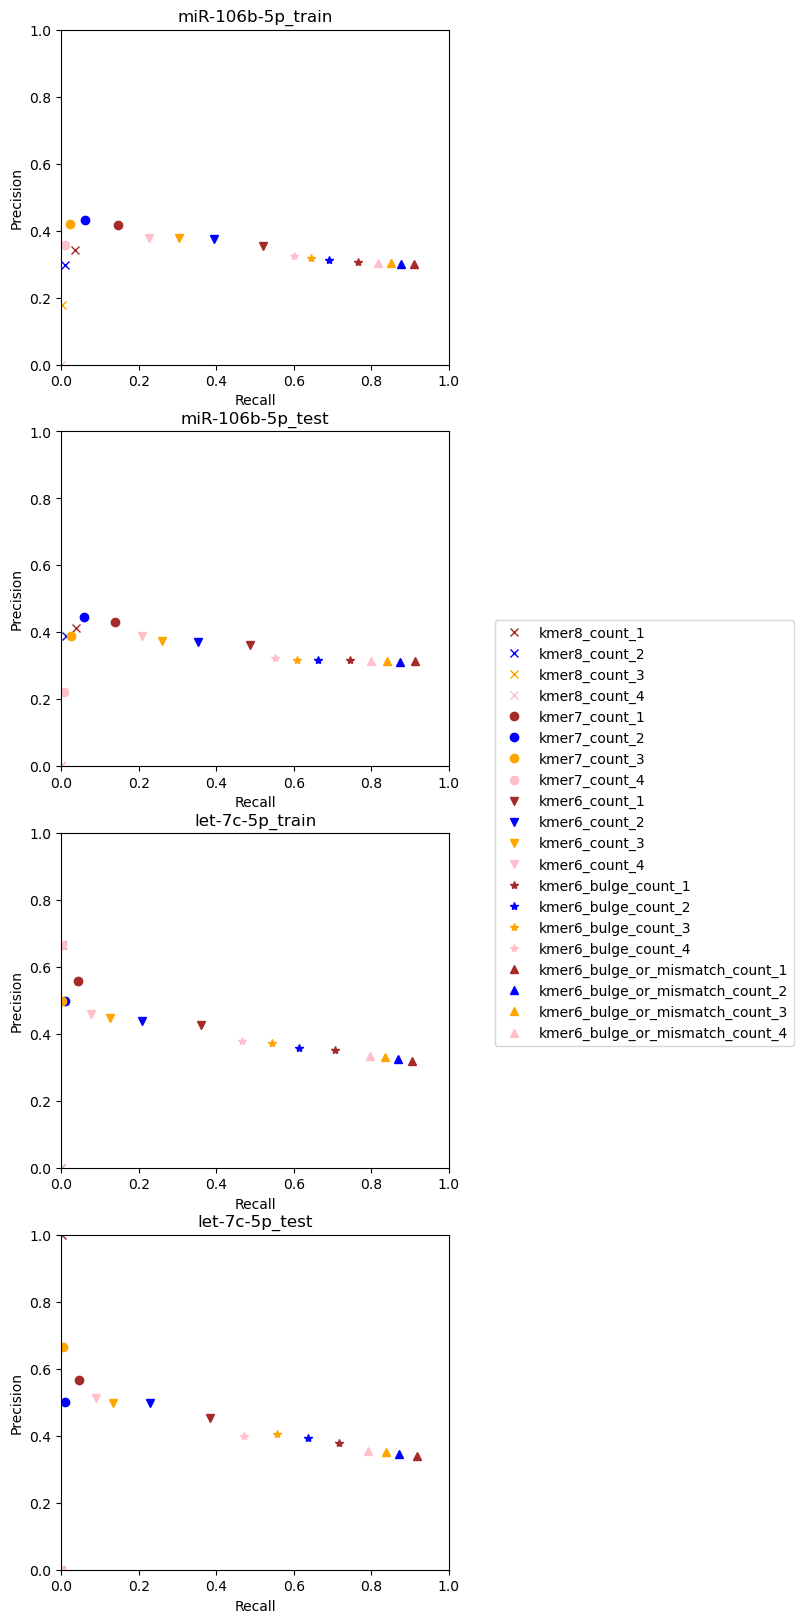

In [26]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = len(data.keys()), ncols=1, figsize=(5, 5*len(data.keys())))
for index, name in enumerate(data.keys()):

    markers = {
        'kmer8': 'x',
        'kmer7': 'o',
        'kmer6': 'v',
        'kmer6_bulge': '*',
        'kmer6_bulge_or_mismatch': '^'
    }

    colors = ['brown', 'blue', 'orange', 'pink', 'gray', 'black']

    for seed_name in seed_types.keys():
        marker = markers[seed_name]
        for threshold in [1,2,3,4]:

            prec, rec, _, _ = precision_recall_fscore_support(data[name]['label'].values, data[name][seed_name + "_count_" + str(threshold)].values, average='binary')

            ax[index].plot(rec, prec, marker, color=colors[threshold - 1],  label=seed_name + "_count_" + str(threshold))

    ax[index].set_title(name)
            
    ax[index].set_xlabel('Recall')
    ax[index].set_ylabel('Precision')

    ax[index].set_xlim(0, 1)
    ax[index].set_ylim(0, 1)
    
plt.legend(loc='center left', bbox_to_anchor=(1.1, 2.2))

In [14]:
from pathlib import Path
path = Path(paths['miR-106b-5p_train'])
path.with_name(path.stem + '_test' + path.suffix)

PosixPath('/home/jovyan/miRNA/Seed_experiment/data/miRNA target scanning/mirna_fcs.hsa-miR-106b-5p.train.positive_fc_to_zero.signals.conservation_test.pkl')

In [16]:
from pathlib import Path

out_paths = []

for name, path in paths.items():
    
    out_path = Path(path)
    out_path = out_path.with_name(out_path.stem + '.seed_cls' + out_path.suffix)
    out_paths.append(out_path)
    
    with open(out_path, 'wb') as handle:
        pickle.dump(data[name], handle, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
import zlib
import zipfile

# Select the compression mode ZIP_DEFLATED for compression
# or zipfile.ZIP_STORED to just store the file
compression = zipfile.ZIP_DEFLATED

# create the zip file first parameter path/name, second mode
zf = zipfile.ZipFile(out_paths[0].parent / "seed_cls.zip", mode="w")
try:
    for file_name in out_paths:
        # Add file to the zip file
        # first parameter file to zip, second filename in zip
        zf.write(file_name, file_name.stem + file_name.suffix, compress_type=compression)

except FileNotFoundError:
    print("An error occurred")
finally:
    # Don't forget to close the file!
    zf.close()